<a href="https://colab.research.google.com/github/gveloso7/Exercicio-Womakerscode/blob/main/Licao3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/clientes.csv"
df = pd.read_csv(file_path)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,cliente_id,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou
0,1,56,30,27,Centro-Oeste,96.03,1
1,2,69,11,2,Norte,91.22,0
2,3,46,58,21,Sul,56.45,0
3,4,32,55,1,Norte,69.61,0
4,5,60,28,28,Sul,42.19,0
5,6,25,25,15,Sul,35.05,0
6,7,38,39,1,Nordeste,57.10,0
7,8,56,33,5,Sul,48.27,0
8,9,36,1,28,Sudeste,66.69,0
9,10,40,57,29,Centro-Oeste,26.22,0


In [ ]:
#filtrando os clientes que cancelaram em até 6 meses

recentes = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] <= 6)]

#filtrando os clientes que cancelaram em mais de 24 meses
antigos = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] > 24)]

print(f"Clientes que cancelaram recentemente (≤6 meses): {len(recentes)}")
print(f"Clientes que cancelaram há mais tempo (>24 meses): {len(antigos)}")

#Realizando a comparação das médias dos grupos
print("\nComparação de médias entre grupos:")
print(pd.concat([
    recentes[['idade', 'tempo_assinatura_meses', 'frequencia_uso_mensal', 'mensalidade']].mean().rename('Recentes'),
    antigos[['idade', 'tempo_assinatura_meses', 'frequencia_uso_mensal', 'mensalidade']].mean().rename('Antigos')
], axis=1))

print(f"\nA média do tempo de assinatura dos clientes recentes: {recentes['tempo_assinatura_meses'].mean():.2f} meses")
print(f"A média do tempo de assinatura dos clientes antigos: {antigos['tempo_assinatura_meses'].mean():.2f} meses")



Clientes que cancelaram recentemente (≤6 meses): 9
Clientes que cancelaram há mais tempo (>24 meses): 32

Comparação de médias entre grupos:
                         Recentes    Antigos
idade                   40.888889  44.250000
tempo_assinatura_meses   3.222222  43.375000
frequencia_uso_mensal   11.555556  16.062500
mensalidade             60.358889  60.879062

A média do tempo de assinatura dos clientes recentes: 3.22 meses
A média do tempo de assinatura dos clientes antigos: 43.38 meses


<ipython-input-35-a3e96e0e19af>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([recentes['tempo_assinatura_meses'], antigos['tempo_assinatura_meses']],


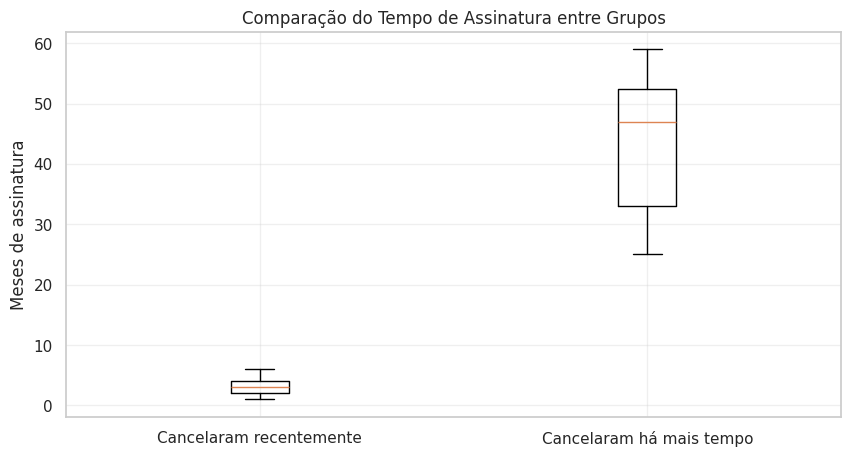

In [ ]:
#Comparação visual do tempo de cancelamento entre os grupos
plt.figure(figsize=(10, 5))
plt.boxplot([recentes['tempo_assinatura_meses'], antigos['tempo_assinatura_meses']],
            labels=['Cancelaram recentemente', 'Cancelaram há mais tempo'])
plt.title('Comparação do Tempo de Assinatura entre Grupos')
plt.ylabel('Meses de assinatura')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Teste t student para compararas amostras(grupos de cancelamento recente e antigos) e verificar se há diferença estatisticamente significativa
#t_stat é a diferença entre as médias dos grupos em relação à variação dentro dele e  p_value obtém "valores extremos", para verificar se há uma diferença estatistica

t_stat, p_value = ttest_ind(recentes['tempo_assinatura_meses'], antigos['tempo_assinatura_meses'], equal_var=False)

print(f"\nHá uma diferença altamente significativa no tempo de assinatura entre os grupos ≤6 meses e >24 meses: t = {t_stat.mean():.2f} vs p = {p_value.mean():.21f}")
print(f"\nIsto aponta que quem é assinante recente (≤6 meses) cancela a assinatura mais cedo")



Há uma diferença altamente significativa no tempo de assinatura entre os grupos ≤6 meses e >24 meses: t = -19.35 vs p = 0.000000000000000000017

Isto aponta que quem é assinante recente (≤6 meses) cancela a assinatura mais cedo
